In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
plt.rcParams["figure.figsize"] = (12,8) # set figure size

# Monte-carlo simulation to get a mean
* In some situations, it is  difficult to calculate mean and variance analytically. In this case, Monte carlo approach can be used. 
* Suppose we want to get mean and variance of $$x^3$$ where x follows normal(0,1).

In [10]:
nsim = 10000
x = np.random.normal(0, 1, nsim)
x3 = x**3
print('mean:', np.mean(x3))
print('sd:', np.std(x3))

mean: -0.03568974547995112
sd: 3.9767725956771542


## Monte-carlo simulation for BMI
Suppose that (height,weight) in Korean Male follows MVN. We simulate (height,weight) from MVN and obtain mean and variance of BMI

mu: [173  68] 

Sigma: [[25 10]
 [10 16]] 



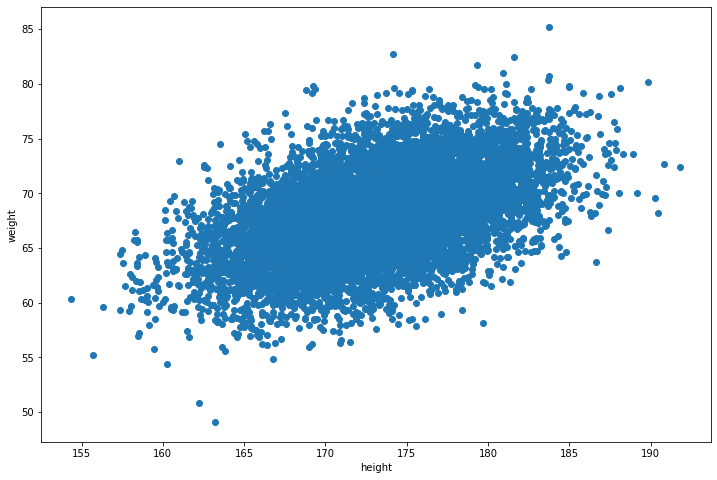

In [11]:
nsim = 10000
mu = np.array([173,68])
Sigma = np.array([[25,10],[10,16]])

print("mu:", mu, "\n")
print("Sigma:", Sigma, "\n")

X = np.random.multivariate_normal(mu, Sigma, size=nsim)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('height')
plt.ylabel('weight');


BMI mean: 22.74533238684753
BMI sd: 1.3413635346172892


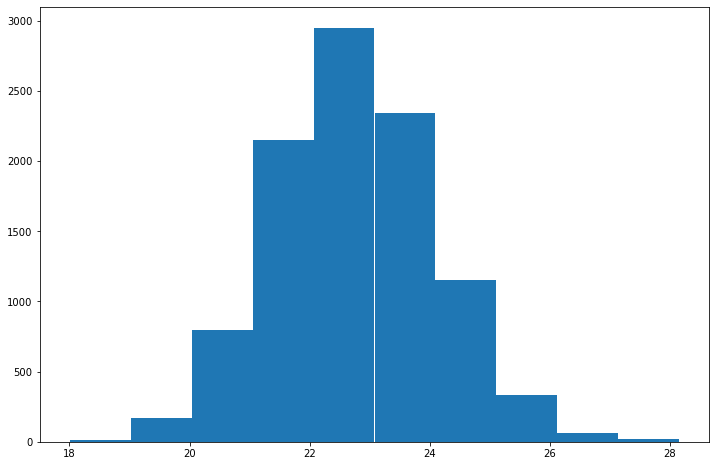

In [12]:
# BMI
BMI = X[:,1]/(X[:,0]/100)**2
plt.hist(BMI)

print('BMI mean:', np.mean(BMI))
print('BMI sd:', np.std(BMI))

## COVID simulation
* Consider the COVID simulation used in the previous note. Researchers are interested in estimating the mean and variance of new cases after 50 days (without social distancing, etc).
* Analytically calculating this is very difficult. But we can use Monte-carlo approach to get them easily

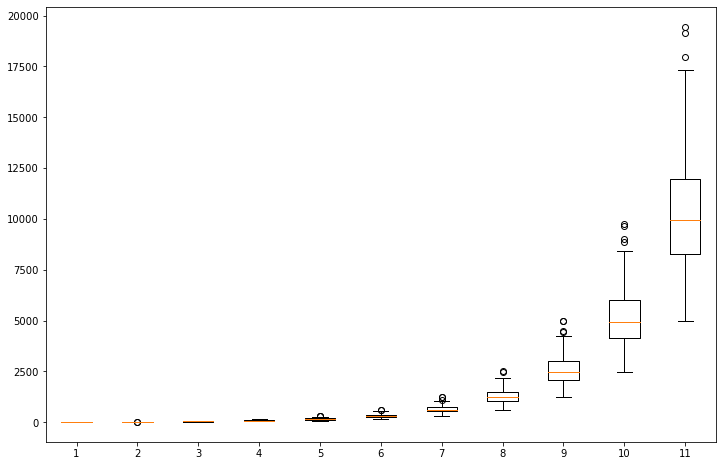

In [13]:
def Get_Trajectory():
    n_current_case = 10
    n_case_trajectory = np.zeros(11)
    n_case_trajectory[0] = 10

    for i in range(10):
        n_contact = np.random.poisson(10, n_current_case)
        n_new_case = np.random.binomial(n_contact, 0.2)
        n_current_case = np.sum(n_new_case)
        n_case_trajectory[i+1] = n_current_case

    return n_case_trajectory

nsim = 100
out_all = []
for i in range(nsim):
    out_all.append(Get_Trajectory())
    
outall = np.array(out_all)
plt.boxplot(outall);

In [14]:

print('mean:', np.mean(outall[:, 10]))
print('sd:', np.std(outall[:, 10]))


mean: 10397.77
sd: 3077.8080572218923
